# TP ISI

### Importo Bibliotecas

In [1579]:
import pandas as pd
import numpy as np
import pycountry_convert as pc

### Lectura de datos

In [1580]:
df = pd.read_csv('data/survey_results_public.csv')

### Columnas

In [1581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

### Cantidad de datos en jos sat

In [1582]:
df['JobSat'].value_counts()

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

### Respondent

In [1583]:
# Es el numero de encuestado, se elimina
df.drop(['Respondent'], axis=1, inplace=True)

### MainBranch

In [1584]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [1585]:
# Nos quedamos como aquellos que son desarrolladores por profesion o, si bien no son desarrolladores, 
# escriben codigo como parte de su trabajo. Se descarta el resto ya que no aportan a la incestigación
# Luego se elimina la columna
values= ['I am a developer by profession', 'I am not primarily a developer, but I write code sometimes as part of my work']
df = df[df.MainBranch.isin(values)]
df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am not primarily a developer, but I write code sometimes as part of my work     5502
Name: MainBranch, dtype: int64

In [1586]:
df = df.drop('MainBranch', axis=1)

### Hobbyist 

In [1587]:
### Describe si ademas de hacerlo de manera laboral, la persona programa como un hobby.
### Nos da una media del interes y el gusto de la persona en la programación. Valores Yes y No, se considera correcta

In [1588]:
df.Hobbyist.value_counts()

Yes    40433
No     12224
Name: Hobbyist, dtype: int64

In [1589]:
# Dado que no es algo laboral, sino mas bien algo que la persona hace fuera de este ambito, se elimnina la columna
df = df.drop('Hobbyist', axis=1)

### Age

In [1590]:
# Completo nulos con la media
# df.Age = df.Age.fillna(df.Age.mean())

# Se consideran nulas todas aquellas edades menores a 16 años y mayores a 90 años
df.Age = df.Age.apply(lambda x: None if (x<16 or x>90) else x)

In [1591]:
def classify_age(x):
    if (x>=16 and x < 25):
        return '16-25'
    if (x >= 25 and x < 35):
        return '25-35'
    if (x >= 35 and x < 45):
        return '35-45'
    if (x >= 45 and x < 55):
        return '45-55'
    if (x >=55):
        return '+55'
    return None
    
# Vamos a dividir a las personas en tres grupos: 
df.Age = df.Age.apply(lambda x: classify_age(x))    


### Age1stCode

In [1592]:
# Edad en la que la persona escribió sus primeras lineas de código
# Esta columna nos sirve para ver si la persona aprendió a programar a una edad adulta o de pequeño
# Vamos a clasificarla en algunos grupos:

In [1593]:
df.Age1stCode=df.Age1stCode.replace('Older than 85', 65)
df.Age1stCode=df.Age1stCode.replace('Younger than 5 years', 5)
df.Age1stCode=df.Age1stCode.fillna(90)


In [1594]:
def classify_Age1stCode(x):
    if (x>=4 and x < 12):
        return '-12'
    if (x >= 12 and x < 18):
        return '12-18'
    if (x >= 18 and x < 25):
        return '18-25'
    if (x >= 25 and x < 35):
        return '25-35'
    if (x >= 35 and x < 45):
        return '35-45'
    if (x >= 45 and x < 60):
        return '45-60'
    if (x >= 60 and x <= 85):
        return '-60'
    return None

# Vamos a dividir a las personas en tres grupos: 
df.Age1stCode = df.Age1stCode.apply(lambda x: classify_Age1stCode(int(x))) 

In [1595]:
df.Age1stCode.value_counts()

12-18    24914
18-25    12139
-12       8881
25-35     1751
35-45      181
45-60       41
-60         14
Name: Age1stCode, dtype: int64

In [1596]:
# Dado que lo que nos interesa es saber la experiencia profesional de la persona, se descarta la columna
# Dado que no es algo laboral, sino mas bien algo que la persona hace fuera de este ambito, se elimnina la columna
df = df.drop('Age1stCode', axis=1)

### CompFreq

In [1597]:
# Frecuencia con la que se recibe la compensación, el campo está correcto

In [1598]:
df.CompFreq.value_counts()

Yearly     19818
Monthly    18899
Weekly      1352
Name: CompFreq, dtype: int64

### CompTotal

In [1599]:
# Es el salario pero expresado en moneda local por lo que se descarta ya que se utilizará el salario en dolares
df.drop(['CompTotal'], axis=1, inplace=True)

###  ConvertedComp 

In [1600]:
# Es el salario en dolares, esta columa nos interesa pero tambien vamos a discretizarla

In [1601]:
def classify_ConvertedComp(x):
    if (x < 10000):
        return '-10000'
    if (x >= 10000 and x < 20000):
        return '10.000-20.000'
    if (x >= 20000 and x < 40000):
        return '20.000-40.000'
    if (x >= 40000 and x < 60000):
        return '40.000-60.000'
    if (x >= 60000 ):
        return '+60000'
    return 'Sin especificar'

df.ConvertedComp = df.ConvertedComp.apply(lambda x: classify_ConvertedComp(x))

In [1602]:
df.ConvertedComp.value_counts()

Sin especificar    17939
+60000             15691
20.000-40.000       5970
40.000-60.000       5755
-10000              3821
10.000-20.000       3519
Name: ConvertedComp, dtype: int64

### Country

In [1603]:
# Convert it to continent

In [1604]:
def get_continent(x):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(x)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None

In [1605]:
df.Country  = df.Country.apply(lambda x: get_continent(x))  

In [1606]:
df.rename(columns = {'Country':'Continent'},inplace=True)

In [1607]:
df.Continent.value_counts()

Europe           20839
North America    13311
Asia             12366
South America     2601
Africa            1713
Oceania           1337
Name: Continent, dtype: int64

### CurrencyDesc /  CurrencySymbol

In [1608]:
# Muchos valores, el salario se analizará en dolares y no aremos un analisis por país sino que a nivel continental
# por lo que la columna se descarta.

In [1609]:
df['CurrencyDesc'].value_counts()

United States dollar    11050
European Euro           10000
Indian rupee             4930
Pound sterling           3127
Canadian dollar          1570
                        ...  
Lesotho loti                1
Somali shilling             1
Libyan dinar                1
Namibian dollar             1
Macanese pataca             1
Name: CurrencyDesc, Length: 142, dtype: int64

In [1610]:
df = df.drop('CurrencyDesc', axis=1)
df = df.drop('CurrencySymbol', axis=1)

### DevType

In [1611]:
def get_developer(x):
    if 'Developer' in x:
        return True
    return False

def get_research(x):
    if 'Educator' in x or 'Academic researcher' in x or 'Scientist' in x:
        return True
    return False

def get_data_sciece(x):
    if 'Data scientist or machine learning specialist' in x or 'Engineer, data' in x:
        return True
    return False

def get_system_admin(x):
    if 'Database administrator' in x or 'System administrator' in x:
        return True
    return False

def get_executive(x):
    if 'Senior Executive (C-Suite, VP, etc.)' in x:
        return True 
    return False

    
    

In [1612]:
# Profesiones
devTypes = ['Developer', 'Research', 'Data_Science', 'System_Admin']
df.DevType.fillna("", inplace=True)
df['Developer']= df.DevType.apply(lambda x: get_developer(x))
df['Research']= df.DevType.apply(lambda x: get_research(x))
df['Data_Science']=df.DevType.apply(lambda x: get_data_sciece(x))
df['System_Admin']=df.DevType.apply(lambda x: get_system_admin(x))

In [1613]:
#Reemplazo valores nulos en DevType por ""
df['DevType']=df['DevType'].fillna("")

In [1614]:
# Elimino Jobfactors
df = df.drop('DevType', axis=1)

In [1615]:
for column in devTypes:
    print(df[column].value_counts())

True     42477
False    10218
Name: Developer, dtype: int64
False    46976
True      5719
Name: Research, dtype: int64
False    46629
True      6066
Name: Data_Science, dtype: int64
False    44903
True      7792
Name: System_Admin, dtype: int64


### EdLevel

In [1616]:
# Solo se emprolijan los valores

In [1617]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          23539
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       12194
Some college/university study without earning a degree                                 5484
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2161
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1563
Associate degree (A.A., A.S., etc.)                                                    1529
Professional degree (JD, MD, etc.)                                                      692
I never completed any formal education                                                  325
Primary/elementary school                                                               257
Name: EdLevel, dtype: int64

In [1618]:
def  reformat_edlevel(x):
    if 'Bachelor’s degree' in x or 'Professional degree' in x:
        return 'Bachelor degree'
    if 'Master’s or doctoral degree' in x or 'Other doctoral degree' in x:
        return 'Master/  doctorate'
    if 'Associate' in x or 'Some college/university study without earning a degree' in x:
        return 'Associate or Incomplete university'
    if 'Secondary school' in x:
        return 'Secondary'
    if 'Primary' in x or 'I never completed any formal education' in x:
        return 'Elemental'
    return None

df['EdLevel']=df['EdLevel'].fillna("")
df['EdLevel'] = df['EdLevel'].apply(lambda x: reformat_edlevel(x))

In [1619]:
df['EdLevel'].value_counts()

Bachelor degree                       24231
Associate or Incomplete university     7013
Secondary                              2161
Master/  doctorate                     1563
Elemental                               582
Name: EdLevel, dtype: int64

###  Employment

In [1620]:
df['Employment'].value_counts()

Employed full-time                                      43348
Independent contractor, freelancer, or self-employed     5001
Employed part-time                                       1634
Student                                                  1118
Not employed, but looking for work                       1108
Not employed, and not looking for work                     94
Retired                                                    67
Name: Employment, dtype: int64

In [1621]:
# Para el analisis solo nos interesan los aquellos que estan empleados full time o part time, 
# el resto no aporta a la investigación
df = df[df.Employment.isin(['Employed full-time', 'Employed part-time'])]
df.Employment.value_counts()

Employed full-time    43348
Employed part-time     1634
Name: Employment, dtype: int64

In [1622]:
# Dado que la cantidad de empleados part time no es significativa, se elimina la columna
df = df.drop('Employment', axis=1)

### Ethnicity

In [1624]:
def get_ethnicity(x):
    if 'White or of European descent' in x:
        return 'European descent'  
    if 'Asian' in x or 'Middle Eastern' in x:
        return 'Asian'
    if 'Hispanic or Latino/a/x' in x:
        return 'Latino'
    if 'Indigenous' in x or 'Multiracial' or 'Black or of African descent' in x:
        return 'Other'
    return None

In [1625]:
df.Ethnicity = df.Ethnicity.fillna("")
df.Ethnicity = df['Ethnicity'].apply(lambda x: get_ethnicity(x))
df.Ethnicity.value_counts()    

European descent    23248
Other               13324
Asian                6632
Latino               1778
Name: Ethnicity, dtype: int64

### Gender

In [1626]:
df['Gender'].value_counts()

Man                                                            32570
Woman                                                           2739
Non-binary, genderqueer, or gender non-conforming                255
Man;Non-binary, genderqueer, or gender non-conforming             78
Woman;Non-binary, genderqueer, or gender non-conforming           53
Woman;Man                                                         35
Woman;Man;Non-binary, genderqueer, or gender non-conforming       15
Name: Gender, dtype: int64

In [1627]:
def get_gender(x):
    if 'Non-binary' in x or 'Woman;Man' in x:
        return 'Non-binary'
    if 'Woman' in x:
        return 'woman'
    if 'Man' in x:
        return 'Man'
    return None

In [1628]:
df.Gender = df.Gender.fillna("")
df.Gender = df.Gender.apply(lambda x: get_gender(x))

In [1629]:
df.Gender.value_counts()

Man           32570
woman          2739
Non-binary      436
Name: Gender, dtype: int64

In [1630]:
# Dada que la mayoria de las personas son hombres, se descarta la columna
df = df.drop('Gender', axis=1)

### JobFactors

In [1631]:
JobFactors_list = [
    'Remote work',
    'company culture',
    'Financial performance',
    'Opportunities',
    'Diversity',
    'impactful',
    'Industry',
    'Specific department',
    'Flex time',
    'technologies',
    'Family friendliness',
]

In [1632]:
#Inicializo las columnas en None
for column in JobFactors_list:
    df[column] = None

In [1633]:
#Reemplazo valores nulos en JobFactor por ""
df['JobFactors']=df['JobFactors'].fillna("")

In [1634]:
# Para cada factor me fijo si la persona lo marcó
for column in JobFactors_list:
    df[column] = df['JobFactors'].apply(lambda x: column in x )

In [1635]:
# Vemos como quedaron las columnas
for column in JobFactors_list:
    print(df[column].value_counts())

False    33016
True     11966
Name: Remote work, dtype: int64
False    27762
True     17220
Name: company culture, dtype: int64
False    40534
True      4448
Name: Financial performance, dtype: int64
False    29720
True     15262
Name: Opportunities, dtype: int64
False    42521
True      2461
Name: Diversity, dtype: int64
False    37482
True      7500
Name: impactful, dtype: int64
False    39702
True      5280
Name: Industry, dtype: int64
False    40678
True      4304
Name: Specific department, dtype: int64
False    28448
True     16534
Name: Flex time, dtype: int64
False    25791
True     19191
Name: technologies, dtype: int64
False    40438
True      4544
Name: Family friendliness, dtype: int64


In [1636]:
# Elimino Jobfactors
df = df.drop('JobFactors', axis=1)

### JobSat

In [1637]:
df['JobSat'].value_counts()

Very satisfied                        12953
Slightly satisfied                    12664
Slightly dissatisfied                  6514
Neither satisfied nor dissatisfied     5070
Very dissatisfied                      3306
Name: JobSat, dtype: int64

In [1638]:
# Es la columna que queremos predecir por lo que se eliminan todos los registros que no tienen datos en esta columna
df = df.dropna(subset = ["JobSat"])

In [1639]:
#Se agrupa satisfecho, ni satisfecho ni insatisfecho y desatisfecho
def get_JobSat(x):
    if x in ['Very satisfied', 'Slightly satisfied']:
        return 'Satisfied'
    if x in ['Very dissatisfied', 'Slightly dissatisfied']:
        return 'Dissatisfied'
    return "Neither"

df['JobSat'] = df['JobSat'].apply(lambda x: get_JobSat(x))

In [1640]:
df['JobSat'].value_counts()

Satisfied       25617
Dissatisfied     9820
Neither          5070
Name: JobSat, dtype: int64

### JobSeek

In [1641]:
df.JobSeek.value_counts()

I’m not actively looking, but I am open to new opportunities    22754
I am not interested in new job opportunities                    10539
I am actively looking for a job                                  5009
Name: JobSeek, dtype: int64

In [1642]:
#Reemplazo valores nulos en JobSeek por ""
df['JobSeek'] = df['JobSeek'].fillna("")

In [1643]:
def get_jobseek(x):
    if 'I’m not actively looking, but I am open to new opportunities' in x:
        return 'Open to opportunities'
    if 'I am not interested in new job opportunities' in x:
        return 'Not interested'
    if 'I am actively looking for a job' in x:
        return 'Looking for'
    return None

In [1644]:
df.JobSeek = df.JobSeek.apply(lambda x: get_jobseek(x))

In [1645]:
df.JobSeek.value_counts()

Open to opportunities    22754
Not interested           10539
Looking for               5009
Name: JobSeek, dtype: int64

### NEWDevOps NEWDevOpsImpt 

In [1646]:
# Dejarlo en si le parece importante y tiene, le parece importante y no tiene, Irrelevante
df['NEWDevOps'].value_counts()

Yes         17502
No          16193
Not sure     4851
Name: NEWDevOps, dtype: int64

In [1647]:
df['NEWDevOpsImpt'].value_counts()

Extremely important     18463
Somewhat important      11618
Neutral                  6366
Not very important        722
Not at all important      493
Name: NEWDevOpsImpt, dtype: int64

In [1648]:
def devops_important(row):
    important_value = row['NEWDevOpsImpt']
    devops_value = row['NEWDevOps']
    if isinstance(devops_value, str) and isinstance(important_value, str):
        is_important = ('Extremely' in important_value) or ('Somewhat' in important_value)
        has_devops = devops_value == 'Yes'
        if is_important and has_devops:
            return 'YES YES'
        if is_important and (not has_devops):
            return 'YES NO'
        return 'I'
    return None

df['DevOpsImp'] = df.apply(devops_important, axis = 1)
df.drop('NEWDevOpsImpt', axis=1, inplace=True)
df.drop('NEWDevOps', axis=1, inplace=True)

In [1649]:
df['DevOpsImp'].value_counts()

YES YES    15744
YES NO     14258
I           7558
Name: DevOpsImp, dtype: int64

### NEWEdImpt

In [1650]:
# Cuan importante le parece la educación

In [1651]:
df['NEWEdImpt'].value_counts()

Fairly important                      10670
Very important                         9909
Somewhat important                     9394
Not at all important/not necessary     5885
Critically important                   3878
Name: NEWEdImpt, dtype: int64

In [1652]:
# Esto es opinion de la persona, no vinculada al trabajo por lo que se descarta
df = df.drop('NEWEdImpt', axis=1)

### NEWJobHunt

In [1653]:
# Que conduce a la persona a buscar un nuevo trabajo, se crear una columna booleana por cada categoría.

In [1654]:
# Just because - Without cause
# Having a bad day (or week or month) at work -trouble
# Wanting to share accomplishments with a wider network - opportunities
# Curious about other opportunities - opportunities
# Better compensation - compensation
# Trouble with my teammates - trouble
# Trouble with my direct manager -trouble
# Trouble with leadership at my company -trouble
# Better work/life balance - opportunities
# Wanting to work with new technologies - opportunities
# Growth or leadership opportunities - opportunities
# Looking to relocate - opportunities

df['JobHuntWithoutCause'] = np.where(df['NEWJobHunt'].str.contains('Just because'), True, False)
df['JobHuntTrouble'] = np.where(
    df['NEWJobHunt'].str.contains('Having a bad day') | df['NEWJobHunt'].str.contains('Trouble'),
    True, False)    
df['JobHuntOpportunities'] = np.where(
    df['NEWJobHunt'].str.contains('Wanting to share accomplishments') | 
    df['NEWJobHunt'].str.contains('opportunities') |
    df['NEWJobHunt'].str.contains('Wanting to work with new technologies') |
    df['NEWJobHunt'].str.contains('Better work/life balance'), True, False)
df['JobHuntCompensation'] = np.where(df['NEWJobHunt'].str.contains('compensation'), True, False) 

df.drop('NEWJobHunt', axis=1, inplace=True)

In [1655]:
JOB_HUNT_COLS = ['JobHuntWithoutCause', 'JobHuntTrouble', 'JobHuntOpportunities', 'JobHuntCompensation']
for new_cols in JOB_HUNT_COLS:
    print(df[new_cols].value_counts())

False    32093
True      8414
Name: JobHuntWithoutCause, dtype: int64
False    24476
True     16031
Name: JobHuntTrouble, dtype: int64
True     33891
False     6616
Name: JobHuntOpportunities, dtype: int64
True     30102
False    10405
Name: JobHuntCompensation, dtype: int64


### NEWJobHuntResearch

In [1656]:
# Si no marca nada no sabemos si es nulo o no marcó porque no investiga sobre la companía por lo que se descarta la columna

df.drop('NEWJobHuntResearch', axis=1, inplace=True)

### NEWLearn 

In [1657]:
# Frecuencia con que la persona aprende nuevos lenguajes, puede relacionarse directamente con las columnas  
#LanguageDesireNextYear 
#LanguageWorkedWith
# NEWCollabToolsDesireNextYear 
# NEWCollabToolsWorkedWith
df['NEWLearn'].value_counts()

Once a year             14511
Every few months        12532
Once every few years     9615
Once a decade             784
Name: NEWLearn, dtype: int64

### NEWOffTopic

In [1658]:
# Do you think Stack Overflow should relax restrictions on what is considered “off-topic”? -> no va.
df.drop('NEWOffTopic', axis=1, inplace=True)

### NEWOnboardGood

In [1659]:
# Como considera la persona que fue el proceso de onboarding de la empresa

In [1660]:
# preferible no tener tantos nulos
#df[df['NEWOnboardGood'] == "Onboarding? What onboarding?"] = None

In [1661]:
df['NEWOnboardGood'].value_counts()

Yes                             19314
No                              11722
Onboarding? What onboarding?     7438
Name: NEWOnboardGood, dtype: int64

### NEWOtherComms

In [1662]:
# Pregunta si la persona es miembro de comunidades online de desarrollo, esto no aporta nada sobre el trabajo 
# de la persona en la empresa por lo que se descarta la columna

In [1663]:
df.drop('NEWOtherComms', axis=1, inplace=True)

### NEWOvertime

In [1664]:
df['NEWOvertime'].value_counts()

Sometimes: 1-2 days per month but less than weekly          10450
Often: 1-2 days per week or more                             9418
Occasionally: 1-2 days per quarter but less than monthly     8713
Rarely: 1-2 days per year or less                            6007
Never                                                        4196
Name: NEWOvertime, dtype: int64

In [1665]:
def clasificar_overtime(row):
    overtime = row['NEWOvertime']
    if isinstance(overtime, str):
        if "1-2 days per month but less than weekly" in overtime:
            return "Sometimes"
        elif "1-2 days per week or more" in overtime:
            return "Often"
        elif "1-2 days per quarter but less than monthly" in overtime:
            return "Sometimes"
        elif "1-2 days per year or less" in overtime:
            return "Never or Rarely"
        return "Never or Rarely"

df['NEWOvertime'] = df.apply(clasificar_overtime, axis = 1)

In [1666]:
df['NEWOvertime'].value_counts()

Sometimes          19163
Never or Rarely    10203
Often               9418
Name: NEWOvertime, dtype: int64

### NEWPurchaseResearch

In [1667]:
# When buying a new tool or software, how do you discover and research available solutions? Select all that apply.
# Nada que ver esto con el laburo.
df.drop('NEWPurchaseResearch', axis=1, inplace=True)

### NEWPurpleLink

In [1668]:
# You search for a coding solution online and the first result link is purple because you already visited it. How do you feel?
# No hay info del trabajo.
df.drop('NEWPurpleLink', axis=1, inplace=True)

### NEWStuck

In [1669]:
# What do you do when you get stuck on a problem? Select all that apply.
df.drop('NEWStuck', axis=1, inplace=True)

### OpSys 

In [1670]:
df['OpSys']= df['OpSys'].replace('BSD','Linux-based')

In [1671]:
df['OpSys'].value_counts()

Windows        17405
MacOS          10652
Linux-based     9860
Name: OpSys, dtype: int64

### OrgSize


In [1672]:
df['OrgSize'].value_counts()

20 to 99 employees                                    9102
100 to 499 employees                                  8011
10,000 or more employees                              5971
1,000 to 4,999 employees                              4724
10 to 19 employees                                    3785
2 to 9 employees                                      3371
500 to 999 employees                                  2786
5,000 to 9,999 employees                              1732
Just me - I am a freelancer, sole proprietor, etc.     173
Name: OrgSize, dtype: int64

In [1673]:
def parse_org_size(row):
    org_size = row['OrgSize']
    if isinstance(org_size, str):
        if not 'freelancer' in org_size:
            return org_size

df['OrgSize'] = df.apply(parse_org_size, axis = 1)

In [1674]:
#Elimino freelancers
df = df.dropna(subset=['OrgSize'])

In [1675]:
df['OrgSize'].value_counts()

20 to 99 employees          9102
100 to 499 employees        8011
10,000 or more employees    5971
1,000 to 4,999 employees    4724
10 to 19 employees          3785
2 to 9 employees            3371
500 to 999 employees        2786
5,000 to 9,999 employees    1732
Name: OrgSize, dtype: int64

In [1676]:
def reemplazar_coma(x):
    try:
        return x.replace(",", "")
    except:
        return None

In [1677]:
df['OrgSize']=df['OrgSize'].apply(lambda x: reemplazar_coma(x))

In [1678]:
df['OrgSize'].value_counts()

20 to 99 employees         9102
100 to 499 employees       8011
10000 or more employees    5971
1000 to 4999 employees     4724
10 to 19 employees         3785
2 to 9 employees           3371
500 to 999 employees       2786
5000 to 9999 employees     1732
Name: OrgSize, dtype: int64

### PurchaseWhat

In [1679]:
# What level of influence do you, personally, have over new technology purchases at your organization?

In [1680]:
df['PurchaseWhat'].value_counts()

I have little or no influence       15941
I have some influence               14454
I have a great deal of influence     6510
Name: PurchaseWhat, dtype: int64

In [1681]:
df['PurchaseWhat'] = df['PurchaseWhat'].fillna("")

In [1682]:
def get_incluence(x):
    if 'I have little or no influence' in x:
        return 'No Influcence'
    if 'I have some influence' in x:
        return 'some influence'
    if 'I have a great deal of influence' in x:
        return 'has influence'
    return None

In [1683]:
df.PurchaseWhat = df.PurchaseWhat.apply(lambda x: get_incluence(x))

### Sexuality

<AxesSubplot:>

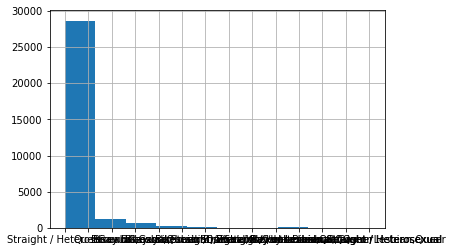

In [1684]:
df['Sexuality'].hist()

In [1685]:
df['Sexuality'].value_counts()

Straight / Heterosexual                                  28501
Bisexual                                                  1206
Gay or Lesbian                                             669
Bisexual;Straight / Heterosexual                           173
Queer                                                      161
Bisexual;Queer                                             137
Gay or Lesbian;Queer                                        59
Straight / Heterosexual;Queer                               43
Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer       20
Bisexual;Gay or Lesbian                                     20
Bisexual;Gay or Lesbian;Queer                               15
Bisexual;Straight / Heterosexual;Queer                       6
Bisexual;Gay or Lesbian;Straight / Heterosexual              5
Gay or Lesbian;Straight / Heterosexual                       5
Name: Sexuality, dtype: int64

In [1686]:
# Esta columna no aporta nada, hay gran mayoria de strights.
df.drop('Sexuality', axis=1, inplace=True)

### SOAccount and SOPartFreq and SOComm and SOVisitFreq and NEWSOSites and SuaveryEase and WelcomeChange

In [1687]:
# Preguntas relacionadas al Sitio de StackOverflow.
df.drop('SOAccount', axis=1, inplace=True) # Si tiene cuenta en SO.
df.drop('SOPartFreq', axis=1, inplace=True) # Frecuencia de participacion en SO.
df.drop('SOComm', axis=1, inplace=True) # Si es parte de una comunidad de SO.
df.drop('SOVisitFreq', axis=1, inplace=True) # Frecuencia de visita a SO.
df.drop('NEWSOSites', axis=1, inplace=True) # Cuantos sitios nuevos visitas de SO.
df.drop('WelcomeChange', axis = 1, inplace=True) # Compared to last year, how welcome do you feel on Stack Overflow?
# Relacionado con la encuesta
df.drop('SurveyEase', axis=1, inplace=True) # Cuan facil te resulto la encuesta.
df.drop('SurveyLength', axis=1, inplace=True) # Cuan larga te resulto la encuesta.

### Trans

<AxesSubplot:>

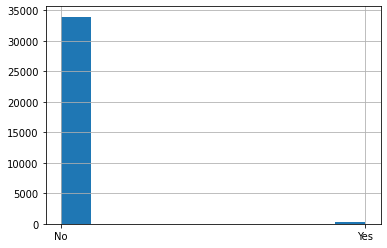

In [1688]:
df['Trans'].hist()

In [1689]:
df.drop('Trans', axis=1, inplace=True)

### UndergradMajor

In [1690]:
# What was your primary field of study?

In [1691]:
df['UndergradMajor'].value_counts()
# Computer science, computer engineering, or software engineering                   19741 Technology
# Another engineering discipline (such as civil, electrical, mechanical, etc.)       2826 Another engineering
# Information systems, information technology, or system administration              2432 Technology
# A natural science (such as biology, chemistry, physics, etc.)                      1275 Natural sience
# Mathematics or statistics                                                          1075 Mathematics
# Web development or web design                                                       936 Technology
# A business discipline (such as accounting, finance, marketing, etc.)                732 Business
# A humanities discipline (such as literature, history, philosophy, etc.)             621 Humanities
# A social science (such as anthropology, psychology, political science, etc.)        509 Social
# Fine arts or performing arts (such as graphic design, music, studio art, etc.)      432 Art
# I never declared a major                                                            190 eq
# A health science (such as nursing, pharmacy, radiology, etc.)                       112 Health


Computer science, computer engineering, or software engineering                   23304
Another engineering discipline (such as civil, electrical, mechanical, etc.)       3426
Information systems, information technology, or system administration              2918
A natural science (such as biology, chemistry, physics, etc.)                      1571
Mathematics or statistics                                                          1306
Web development or web design                                                      1106
A business discipline (such as accounting, finance, marketing, etc.)                891
A humanities discipline (such as literature, history, philosophy, etc.)             742
A social science (such as anthropology, psychology, political science, etc.)        649
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      517
I never declared a major                                                            243
A health science (such as nursin

In [1692]:
def undergard_major(row):
    undergard_major = row['UndergradMajor']
    if isinstance(undergard_major, str):
        if "health" in undergard_major:
            return "Health"
        elif "software" in undergard_major or 'information' in undergard_major or 'development' in undergard_major:
            return "Technology"
        elif "Another engineering discipline" in undergard_major:
            return "Another engineering"
        elif "natural science" in undergard_major:
            return "Natural sience"
        elif "arts" in undergard_major:
            return "Art"
        elif "social" in undergard_major:
            return "Social"
        elif "humanities" in undergard_major:
            return "Humanities"
        elif "business" in undergard_major:
            return "Business"
        elif 'Mathematics' in undergard_major:
            return 'Mathematics'
        return "I never declared a major"
    return ""

df['UndergradMajor'] = df.apply(undergard_major, axis = 1)

In [1693]:
df['UndergradMajor'].value_counts()

Technology                  27328
Another engineering          3426
                             2678
Natural sience               1571
Mathematics                  1306
Business                      891
Humanities                    742
Social                        649
Art                           517
I never declared a major      243
Health                        131
Name: UndergradMajor, dtype: int64

In [1694]:
df['UndergradMajorTech'] = df.UndergradMajor.apply(lambda x: True if 'Technology' in x else False)

In [1695]:
df['UndergradMajorTech'].value_counts()

True     27328
False    12154
Name: UndergradMajorTech, dtype: int64

In [1696]:
df.drop(['UndergradMajor'], axis=1, inplace=True)

### WorkWeekHrs

In [1697]:
def get_work_week_hrs(x):
    try:
        x = float(x)
        if x <= 40:
            return 'Menos 40'
        else:
           return 'Más 40'
    except:
        return None

In [1698]:
df['WorkWeekHrs'] = df['WorkWeekHrs'].apply(lambda x: get_work_week_hrs(x))

In [1699]:
df['WorkWeekHrs'].value_counts()

Menos 40    26001
Más 40      13481
Name: WorkWeekHrs, dtype: int64

### YearsCode

In [1700]:
def get_year_code(x):
    try:
        x = float(x)
        if x == 0:
            return 'Cero'
        if x > 0 and x <= 2:
            return 'menos 2'
        if x > 2 and x <= 5:
            return '2-5'
        if x > 5 and x <= 10:
            return '5-10'
        if x > 10 and x <= 20:
            return '10-20'
        if x >= 20:
            return '+20'
    except:
        return None

In [1701]:
# More than 50 years --> 51
df['YearsCode'] = [0.5 if x == "Less than 1 year" else 51 if x == "More than 50 years" else x for x in df.YearsCodePro]
df['YearsCode'] = df['YearsCode'].apply(lambda x: get_year_code(x))

In [1702]:
df['YearsCode'].value_counts()

2-5        10940
5-10        9624
menos 2     8541
10-20       7271
+20         2793
Name: YearsCode, dtype: int64

### YearsCodePro

In [1703]:
def get_year_code_pro(x):
    try:
        x = float(x)
        if x == 0:
            return 'Cero'
        if x > 0 and x <= 2:
            return 'menos 2'
        if x > 2 and x <= 5:
            return '2-5'
        if x > 5 and x <= 10:
            return '5-10'
        if x > 10 and x <= 20:
            return '10-20'
        if x >= 20:
            return '-20'
    except:
        return None

In [1704]:
# More than 50 years --> 51
df['YearsCodePro'] = [0.5 if x == "Less than 1 year" else 51 if x == "More than 50 years" else x for x in df.YearsCodePro]
df['YearsCodePro'] = df['YearsCodePro'].apply(lambda x: get_year_code_pro(x))

In [1705]:
df['YearsCodePro'].value_counts()

2-5        10940
5-10        9624
menos 2     8541
10-20       7271
-20         2793
Name: YearsCodePro, dtype: int64

### Todas las columnas que comparan lo que están haciendo con lo que desean para el proximo año

In [1706]:
def compare_tools(actuales, deseos):
    try:
        actuales = set (actuales.split(';'))
    except:
        actuales = set([])
    
    try:
        deseos = set(deseos.split(';'))
    except:
        deseos = set([])
        
    if actuales == set() and deseos == set():
        return None
    
    len_deseos = len(deseos)
    len_actuales = len (actuales)
    

    # Si no hay ningun elemento en comun entre ambos conjuntos entonces hay un cambio total
    if deseos.isdisjoint(actuales):
        return 'CAMBTO'
    
    # Si son iguales
    if actuales == deseos:
        return 'SINC'

    if actuales.issubset(deseos):
        # actuales esta dentro de deseos y no son iguales quiere decir que conserva los actuales y agrega nuevos 
        return 'CONYA'
    
    # ya se que se conservan algunos pero no todos, falta ver si ademas agrega algo

    # veo cuantos se conservan
    len_interseccion = len(actuales & deseos)

    if len_deseos >  len_interseccion:
        return 'CONAYA'

    # Si no agrega nuevo entonces simplemente baja la cantidad de tecnologias
    return 'CONANA'

In [1707]:
df['DatabaseChangesDesires'] = df.apply(lambda x: compare_tools(x.DatabaseWorkedWith,x.DatabaseDesireNextYear), axis=1)

In [1708]:
df['LanguageChangesDesires'] = df.apply(lambda x: compare_tools(x.LanguageWorkedWith,x.LanguageDesireNextYear), axis=1)

In [1709]:
df['MiscTechChangesDesires'] = df.apply(lambda x: compare_tools(x.MiscTechWorkedWith,x.MiscTechDesireNextYear), axis=1)

In [1710]:
df['CollabToolsChangesDesires'] = df.apply(lambda x: compare_tools(x.NEWCollabToolsWorkedWith,x.NEWCollabToolsDesireNextYear), axis=1)

In [1711]:
df['WebframeChangesDesires'] = df.apply(lambda x: compare_tools(x.WebframeWorkedWith,x.WebframeDesireNextYear), axis=1)

In [1712]:
df['PlatformChangesDesires'] = df.apply(lambda x: compare_tools(x.PlatformWorkedWith,x.PlatformDesireNextYear), axis=1)

In [1713]:
df.drop('DatabaseWorkedWith', axis=1, inplace=True)
df.drop('DatabaseDesireNextYear', axis=1, inplace=True)
df.drop('LanguageWorkedWith', axis=1, inplace=True)
df.drop('LanguageDesireNextYear', axis=1, inplace=True)
df.drop('MiscTechWorkedWith', axis=1, inplace=True)
df.drop('MiscTechDesireNextYear', axis=1, inplace=True)
df.drop('NEWCollabToolsWorkedWith', axis=1, inplace=True)
df.drop('NEWCollabToolsDesireNextYear', axis=1, inplace=True)
df.drop('WebframeWorkedWith', axis=1, inplace=True)
df.drop('WebframeDesireNextYear', axis=1, inplace=True)
df.drop('PlatformWorkedWith', axis=1, inplace=True)
df.drop('PlatformDesireNextYear', axis=1, inplace=True)

In [1714]:
df['DatabaseChangesDesires'].value_counts()

CAMBTO    10530
SINC       6990
CONANA     5956
CONYA      5578
CONAYA     5022
Name: DatabaseChangesDesires, dtype: int64

### NULLS

In [1715]:
# Elimino registros con más de la mitad de las columna vacias
#df = df.dropna(thresh=22)

# Reemplazo los restantes NaN
df = df.dropna()

In [1716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14857 entries, 7 to 63517
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        14857 non-null  object
 1   CompFreq                   14857 non-null  object
 2   ConvertedComp              14857 non-null  object
 3   Continent                  14857 non-null  object
 4   EdLevel                    14857 non-null  object
 5   Ethnicity                  14857 non-null  object
 6   JobSat                     14857 non-null  object
 7   JobSeek                    14857 non-null  object
 8   NEWLearn                   14857 non-null  object
 9   NEWOnboardGood             14857 non-null  object
 10  NEWOvertime                14857 non-null  object
 11  OpSys                      14857 non-null  object
 12  OrgSize                    14857 non-null  object
 13  PurchaseWhat               14857 non-null  object
 14  WorkWe

### Renombro columnas

In [1717]:
cols = list(df.columns)
new_cols = []
for col in cols:
    col = col.replace(",","")
    col = col.replace(" ","")
    new_cols.append(col)

In [1718]:
df.columns = new_cols

### JobSat Al final

In [1719]:
# Set class as last col.
CLASS = 'JobSat'
aux = df[CLASS]
df = df.drop(CLASS, 1)
df[CLASS] = aux

C:\Users\dario\AppData\Local\Temp/ipykernel_17412/3814075631.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(CLASS, 1)


### Exporto df

In [1720]:
df.to_csv('clean_data.csv', index=False)